# Import Libraries and Data

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import metrics
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor


In [58]:
df=pd.read_csv('../datasets/final_merged_data.csv')

napa_45=pd.read_csv('../datasets/rcp45_napa.csv')
sonoma_45=pd.read_csv('../datasets/rcp45_sonoma.csv')
sj_45=pd.read_csv('../datasets/rcp45_sj.csv')

napa_85=pd.read_csv('../datasets/rcp85_napa.csv')
sonoma_85=pd.read_csv('../datasets/rcp85_sonoma.csv')
sj_85=pd.read_csv('../datasets/rcp85_sj.csv')


# Future Projections

We will apply the production model to the following RCP (Representative Concentration Pathway) future climate scenarios:<br>
> 4.5: A moderate scenario, where global temperature will rise between 4.5 to 5.5 degrees fahrenheit by 2100.<br>
> 8.5: Worst case scenario, where global temperaature will rise 9 degrees fahrenheit by 2100.<br>

These application will be specific to each of three focus counties, determined by highest economic valuation: Napa, San Joaquin, and Sonoma.


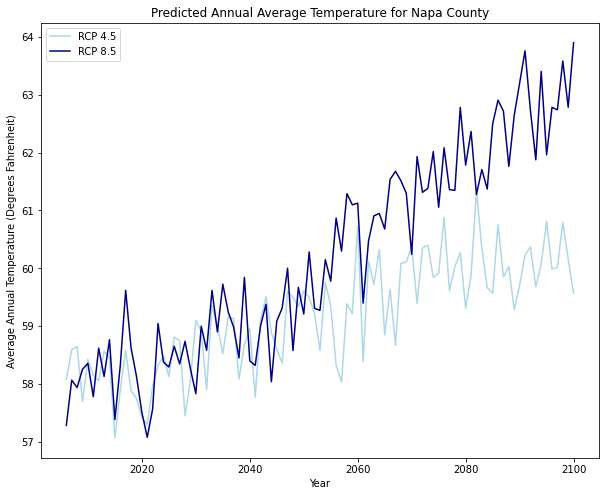

In [59]:
# Example average annual temperature predictions for Napa County
plt.plot(napa_45['year'],napa_45['annual_tavg'],color='lightblue',label='RCP 4.5')
plt.plot(napa_85['year'],napa_85['annual_tavg'],color='navy',label='RCP 8.5')
plt.title('Predicted Annual Average Temperature for Napa County')
plt.xlabel('Year')
plt.ylabel('Average Annual Temperature (Degrees Fahrenheit)')
plt.legend();

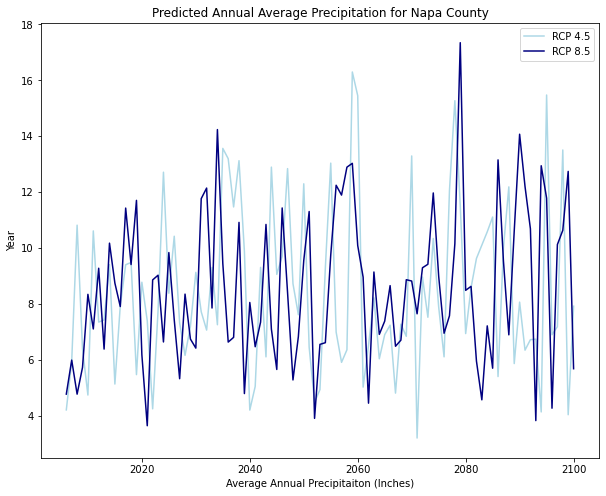

In [60]:
# Example average annual precipitation predictions for Napa County
plt.plot(napa_45['year'],napa_45['annual_precip'],color='lightblue',label='RCP 4.5')
plt.plot(napa_85['year'],napa_85['annual_precip'],color='navy',label='RCP 8.5')
plt.title('Predicted Annual Average Precipitation for Napa County')
plt.xlabel('Average Annual Precipitaiton (Inches)')
plt.ylabel('Year')
plt.legend();

# Model Import

In [61]:
# Move to EDA / Feature Engineering notebook:
# Used in EDA, not used in final model
df.drop(columns=['annual_var','season_var'],inplace=True)

df=pd.get_dummies(df, columns=['county'], drop_first=True)

In [62]:
df.head(3)

,year,county code,harvested acres,yield,production,price p/u,value,annual_precip,annual_tavg,annual_tmin,...,season_tmax,county_Madera,county_Monterey,county_Napa,county_Sacramento,county_San Joaquin,county_San Luis Obispo,county_Santa Barbara,county_Sonoma,county_Yolo
0,2000,19,75139.0,11.12,835310.0,177.0,147550000,20.72,55.708333,31.4,...,87.1,0,0,0,0,0,0,0,0,0
1,2000,39,56410.0,9.92,559563.0,186.0,103830000,25.89,56.516667,31.8,...,88.9,1,0,0,0,0,0,0,0,0
2,2000,55,32365.0,4.23,136962.0,2464.0,337469000,31.24,59.266667,38.1,...,88.6,0,0,1,0,0,0,0,0,0


In [63]:
# Isolate df rows per focus counties, as identified below
df_napa=df[df['county_Napa']==1]
df_sonoma=df[df['county_Sonoma']==1]
df_sj=df[df['county_San Joaquin']==1]

In [64]:
features=['annual_tmax','season_tavg','annual_precip','annual_tavg','annual_tmin','county_Madera','county_Monterey','county_Napa','county_Sacramento','county_San Joaquin','county_San Luis Obispo','county_Santa Barbara','county_Sonoma','county_Yolo']
X=df[features]
y=df['yield']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [65]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

# Model Application

### I. Napa

*RCP 4.5*

In [66]:
X=napa_45[features]
napa_preds_45=lr.predict(X)

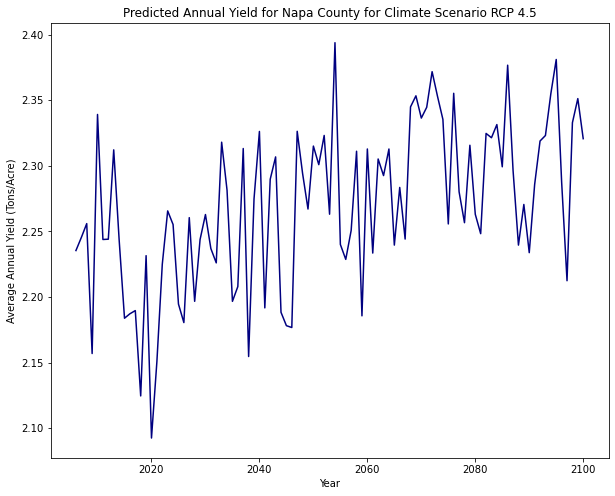

In [67]:
plt.plot(napa_45['year'],napa_preds_45,color='navy')
plt.title('Predicted Annual Yield for Napa County for Climate Scenario RCP 4.5')
plt.xlabel('Year')
plt.ylabel('Average Annual Yield (Tons/Acre)');

*RCP 8.5*

In [68]:
X=napa_85[features]
napa_preds_85=lr.predict(X)

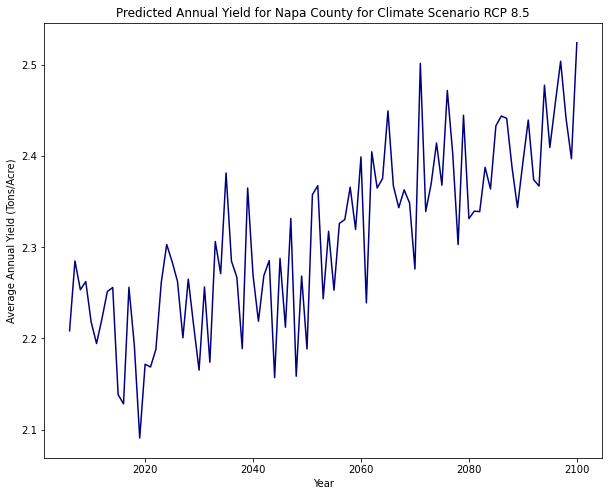

In [69]:
plt.plot(napa_85['year'],napa_preds_85,color='navy')
plt.title('Predicted Annual Yield for Napa County for Climate Scenario RCP 8.5')
plt.xlabel('Year')
plt.ylabel('Average Annual Yield (Tons/Acre)');

*Compared Scenarios*

In [72]:
napa_preds_45.sum(),napa_preds_85.sum()

(215.58806162958382, 219.6089683681975)

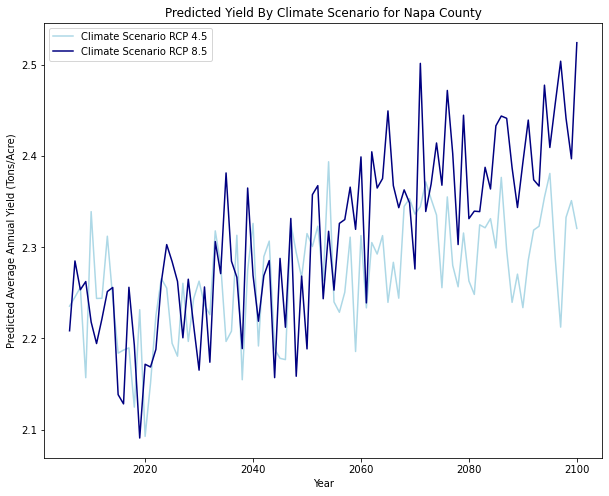

In [45]:
plt.plot(napa_45['year'],napa_preds_45,color='lightblue',label='Climate Scenario RCP 4.5')
plt.plot(napa_85['year'],napa_preds_85,color='navy',label='Climate Scenario RCP 8.5')
plt.title('Predicted Yield By Climate Scenario for Napa County')
plt.xlabel('Year')
plt.ylabel('Predicted Average Annual Yield (Tons/Acre)')
plt.legend();

### Sonoma

*RCP 4.5*

In [46]:
X=sonoma_45[features]
sonoma_preds_45=lr.predict(X)

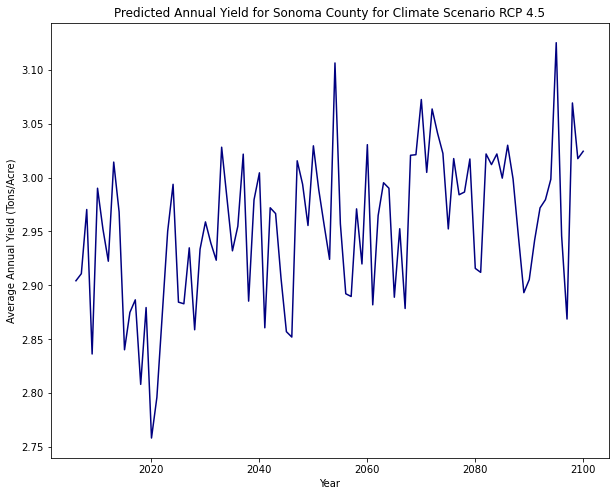

In [47]:
plt.plot(sonoma_45['year'],sonoma_preds_45,color='navy')
plt.title('Predicted Annual Yield for Sonoma County for Climate Scenario RCP 4.5')
plt.xlabel('Year')
plt.ylabel('Average Annual Yield (Tons/Acre)');

##### RCP 8.5

In [48]:
X=sonoma_85[features]
sonoma_preds_85=lr.predict(X)

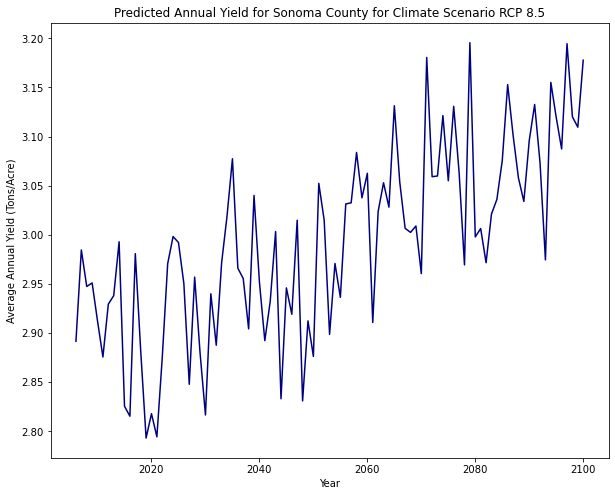

In [49]:
plt.plot(sonoma_85['year'],sonoma_preds_85,color='navy')
plt.title('Predicted Annual Yield for Sonoma County for Climate Scenario RCP 8.5')
plt.xlabel('Year')
plt.ylabel('Average Annual Yield (Tons/Acre)');

##### Compared Scenarios

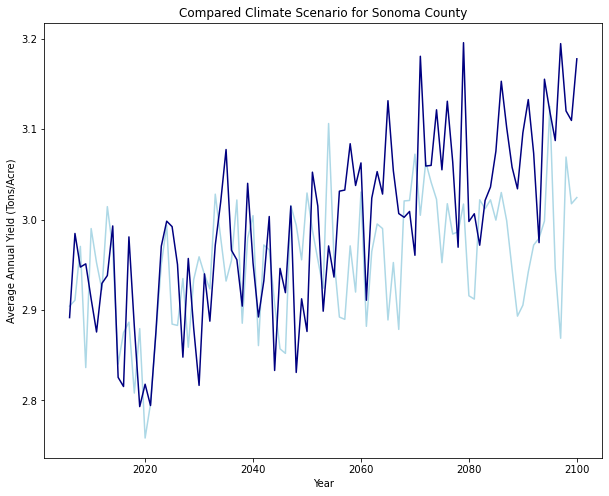

In [50]:
plt.plot(sonoma_45['year'],sonoma_preds_45,color='lightblue',label='Climate Scenario RCP 4.5')
plt.plot(sonoma_85['year'],sonoma_preds_85,color='navy',label='Climate Scenario RCP 8.5')
plt.title('Compared Climate Scenario for Sonoma County')
plt.xlabel('Year')
plt.ylabel('Average Annual Yield (Tons/Acre)');

### San Joaquin

##### RCP 4.5

In [51]:
X=sj_45[features]
sj_preds_45=lr.predict(X)

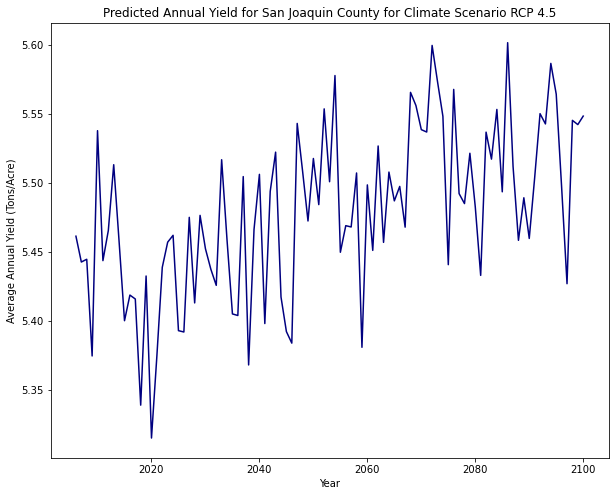

In [52]:
plt.plot(sj_45['year'],sj_preds_45,color='navy')
plt.title('Predicted Annual Yield for San Joaquin County for Climate Scenario RCP 4.5')
plt.xlabel('Year')
plt.ylabel('Average Annual Yield (Tons/Acre)');

##### RCP 8.5

In [53]:
X=sj_85[features]
sj_preds_85=lr.predict(X)

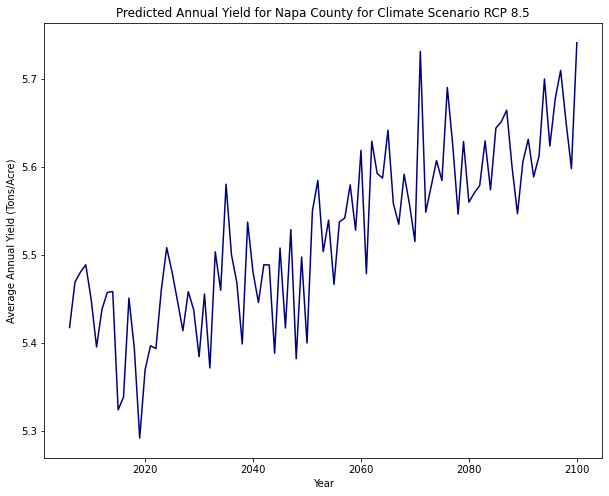

In [54]:
plt.plot(sj_85['year'],sj_preds_85,color='navy')
plt.title('Predicted Annual Yield for Napa County for Climate Scenario RCP 8.5')
plt.xlabel('Year')
plt.ylabel('Average Annual Yield (Tons/Acre)');

##### Compared Scenarios

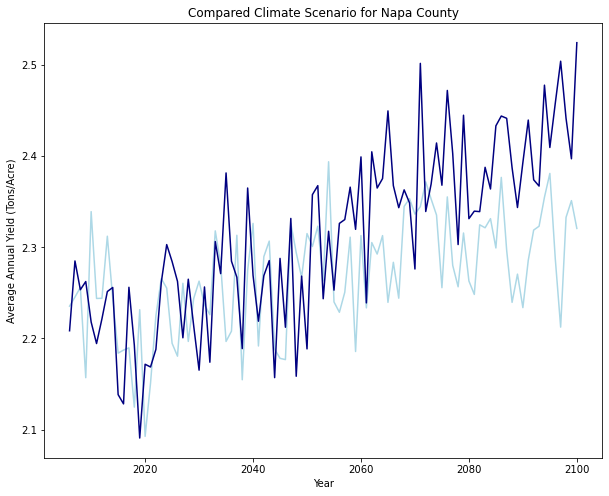

In [55]:
plt.plot(napa_45['year'],napa_preds_45,color='lightblue',label='Climate Scenario RCP 4.5')
plt.plot(napa_85['year'],napa_preds_85,color='navy',label='Climate Scenario RCP 8.5')
plt.title('Compared Climate Scenario for Napa County')
plt.xlabel('Year')
plt.ylabel('Average Annual Yield (Tons/Acre)');